<a href="https://colab.research.google.com/github/younesabdolmalaky/Model-comparing-and-Hyperparameter-Tuning-Trial/blob/main/Model_comparing_and_Hyperparameter_Tuning_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#About the dataset
##The data points were collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load. Features consist of hourly average ambient variables - Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

##A combined-cycle power plant uses both gas and a steam turbine together to produce up to 50 percent more electricity from the same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine is routed to the nearby steam turbine, which generates extra power.

##All the UN Member States have to submit a report on the combined cycle power plant to the United Nations. The Power Plant officials of Mexico are devising a way to predict the net hourly electrical energy output (PE) of the plant. You are appointed as the chief for this operation. Create a Machine Learning Model to solve this problem efficiently.

#Introduction¶

##Single-cycle gas turbine power plants generate electricity by using natural gas and compressed air. Air is drawn from the surroundings, compress ed, and fed into the combustion chamber of the gas turbine. Here, natural gas is injected which mixes with the compressed air and ignited. The combustion produces a high-pressure, hot gas stream that flows through the turbine causing it to spin (at tremendous speeds). Consequently, this spins a generator which is connected to the turbine to produce electricity. For single-cycle gas turbines, much of the energy is wasted as hot exhaust achieving an energy conversion efficiency of 35% at best. Combined cycle power plants exploit this inefficiency by capturing the waste heat using a heat recovery steam generator (HRSG), to produce even more power. Combined cycle power plants are power generation plants that use both gas and steam turbines together to generate electricity. The waste heat generated from the gas turbine is used to produce steam which is fed to a steam turbine to generate even more electricity. This increases the power produced (up to 50% more) for the same amount of fuel, as well as increases the plant’s efficiency to about 60%. The Output power of the Combined Cycle Power Plant (CCPP) is dependent on a few parameters which are atmospheric pressure, exhaust steam pressure, ambient temperature, and relative humidity. Being able to predict the full load electrical power output is important for the efficient and economic operation of the power plant.

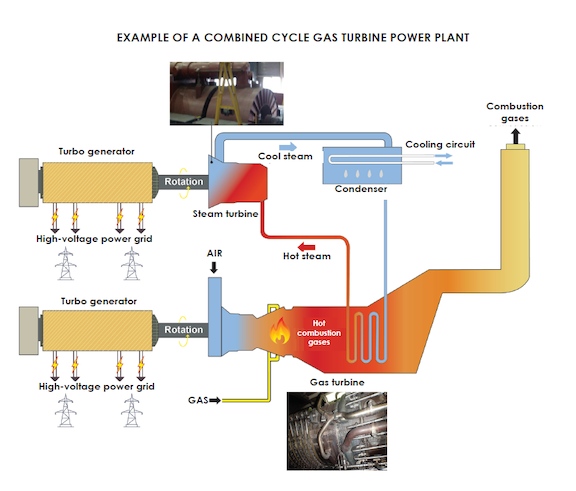

#Algorithms Overview
##Linear Regression:
Linear regression is a simple and classic regression algorithm. It tries to fit a line to the data that minimizes the sum of the squared differences between the true values and the predicted values. The mathematical formula for linear regression can be represented as y = b0 + b1x1 + b2x2 + ... + bn*xn, where b0, b1, b2, ..., bn are the coefficients and x1, x2, ..., xn are the independent variables.

##Decision Tree:
Decision tree is a simple and easy to interpret tree-based algorithm. It recursively splits the data into subsets based on the feature that provides the highest reduction in impurity. The mathematical formula for decision trees is based on entropy and information gain.

##Random Forest:
Random forest is an ensemble algorithm that uses multiple decision trees to make a prediction. The prediction is made by aggregating the predictions of each individual tree, typically by taking the average. Random forest improves upon decision trees by reducing overfitting and improving generalization.

#K-Nearest Neighbors:
 K-Nearest Neighbors is a simple and intuitive non-parametric algorithm. It predicts the target variable for a new sample based on the average of the k nearest samples in the training set. The mathematical formula for KNN is based on the Euclidean distance between samples.

#Support Vector Regression:
 Support Vector Regression is a variation of Support Vector Machines that is used for regression. It tries to fit a hyperplane that maximizes the margin between the samples and the hyperplane. The mathematical formula for SVR is based on the optimization of a convex cost function.

#CatBoost: 
CatBoost is a gradient boosting algorithm specifically designed for categorical data. It uses a combination of decision trees and gradient descent to make predictions. The mathematical formula for CatBoost is based on gradient boosting and decision trees.

#XGBoost: 
XGBoost is another gradient boosting algorithm that is widely used in data science. Like CatBoost, it also uses gradient boosting with decision trees as its base model.
#Deep Learning Neural Network:
Deep Learning Neural Network (DLNN) is a type of artificial neural network (ANN) that is designed to mimic the structure and function of the human brain. It consists of multiple interconnected processing nodes, or neurons, that are organized into layers. The input layer receives the input data, and the output layer produces the prediction. The hidden layers are responsible for transforming the input into a form that can be used by the output layer to make the prediction. The neurons in each layer are connected to the neurons in the next layer through weighted connections, and the weights are adjusted during training to minimize the difference between the true and predicted values. DLNNs are capable of learning complex relationships in the data and can be used for a variety of tasks, including classification and regression. The mathematical formula for DLNNs involves the computation of dot products, activation functions, and backpropagation of errors for weight adjustment.

# imports the necessary librares
in this block block imports the necessary librares:i pandas is used to read and manipulate the dataset, train_test_split is used to split the data into training and test sets, StandardScaler is used to preprocess the data, r2_score and mean_absolute_error are used to evaluate the performance of the models, catboost, xgboost, and tensorflow are used for the regression algorithms.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import catboost
import xgboost
import tensorflow as tf
import time

# Load Data
###In this block, the dataset is loaded into a pandas DataFrame.


In [4]:
# Load the dataset
df = pd.read_csv('../datasets/Training_set_ccpp.csv')

# Split the data into training and test sets
X = df.drop(["PE"], axis=1)
y = df["PE"]

# train test split
In this block, the data is split into training and test sets, with 20% of the data being used as the test set.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pre-process the data
In this block, the training data is preprocessed using the StandardScaler.


In [6]:

# Pre-process the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Algorithms
In this block, eight regression algorithms are fit to the training data: Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Regression, CatBoost, XGBoost, and Deep Learning Neural Network.


In [7]:
# Fit the algorithms
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    SVR(),
    catboost.CatBoostRegressor(verbose = 0 , eval_metric='R2',iterations=2000 , task_type='GPU'),
    xgboost.XGBRegressor(),
    tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
]

model_names = [
    "Linear Regression",
    "Decision Tree",
    "Random Forest",
    "K-Nearest Neighbors",
    "Support Vector Regression",
    "CatBoost",
    "XGBoost",
    "Deep Learning Neural Network"
]


# Evaluate
In this, the performance of each algorithm is evaluated using the R2 score and the mean absolute error (MAE) on the test data.

In [8]:
# Evaluate each algorithm
R2_MAE = []
for model, name in zip(models, model_names):
  start = time.time()
  if name == "Deep Learning Neural Network":
    model.compile(optimizer='adam', loss='mean_absolute_error')
    model.fit(X_train, y_train , epochs=100 , batch_size=32 , verbose =0)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  end = time.time()
  R2_MAE.append([name , r2 , mae , end - start])


Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


[21:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
41/41 [==============================] - 0s 1ms/step


In [9]:
pd.DataFrame(R2_MAE , columns = ['Model name' ,'R2-score' , 'MAE' , 'Time'])

,Model name,R2-score,MAE,Time
0,Linear Regression,0.924769,3.669618,0.029593
1,Decision Tree,0.921349,3.313986,0.045285
2,Random Forest,0.955716,2.526763,2.827737
3,K-Nearest Neighbors,0.941989,3.001490,0.015856
4,Support Vector Regression,0.936554,3.240146,1.661543
5,CatBoost,0.950686,2.768416,15.061745
6,XGBoost,0.943266,3.055684,0.577507
7,Deep Learning Neural Network,0.928563,3.521634,34.228411


## The model comparison is based on R2-score, Mean Absolute Error (MAE), and Time.

The best R2-score is obtained by Random Forest (0.955716) and CatBoost (0.950686), followed by K-Nearest Neighbors (0.941989).
The lowest MAE is achieved by Random Forest (2.526763) and CatBoost (2.768416), followed by K-Nearest Neighbors (3.001490).
The fastest model is Linear Regression (0.029593), followed by K-Nearest Neighbors (0.015856) and XGBoost (0.577507). The slowest model is Deep Learning Neural Network (34.228411).